<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/2203a52117/blob/main/lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("/content/breast_cancer_survival (2).csv")
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
data['Patient_Status'] = data['Patient_Status'].map({'Alive': 1, 'Dead': 0})
data['HER2 status'] = data['HER2 status'].map({'Positive': 1, 'Negative': 0})
data = data.fillna(data.mean())
columns_to_drop = ['Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Histology', 'Tumour_Stage', 'Gender','ER status','PR status']
data= data.drop(columns=columns_to_drop)
if data['Patient_Status'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")
features = data.drop("Patient_Status", axis=1)
target = data["Patient_Status"].astype(int)
print("TARGET:",target)
print("FEATURES:",features)


TARGET: 0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Length: 334, dtype: int64
FEATURES:      Age  Protein1  Protein2  Protein3  Protein4  HER2 status
0     42  0.952560   2.15000  0.007972 -0.048340            0
1     54  0.000000   1.38020 -0.498030 -0.507320            0
2     63 -0.523030   1.76400 -0.370190  0.010815            0
3     78 -0.876180   0.12943 -0.370380  0.132190            0
4     42  0.226110   1.74910 -0.543970 -0.390210            1
..   ...       ...       ...       ...       ...          ...
329   59  0.024598   1.40050  0.024751  0.280320            1
330   41  0.100120  -0.46547  0.472370 -0.523870            1
331   54  0.753820   1.64250 -0.332850  0.857860            0
332   74  0.972510   1.42680 -0.366570 -0.107820            0
333   66  0.286380   1.39980  0.318830  0.836050            0

[334 rows x 6 columns]


<ipython-input-33-28712cb51d3a>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


[0.4925373134328358, 0.6865671641791045, 0.6119402985074627, 0.7611940298507462, 0.6865671641791045, 0.746268656716418, 0.746268656716418, 0.7611940298507462, 0.7313432835820896, 0.7611940298507462, 0.7611940298507462, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746, 0.7761194029850746]


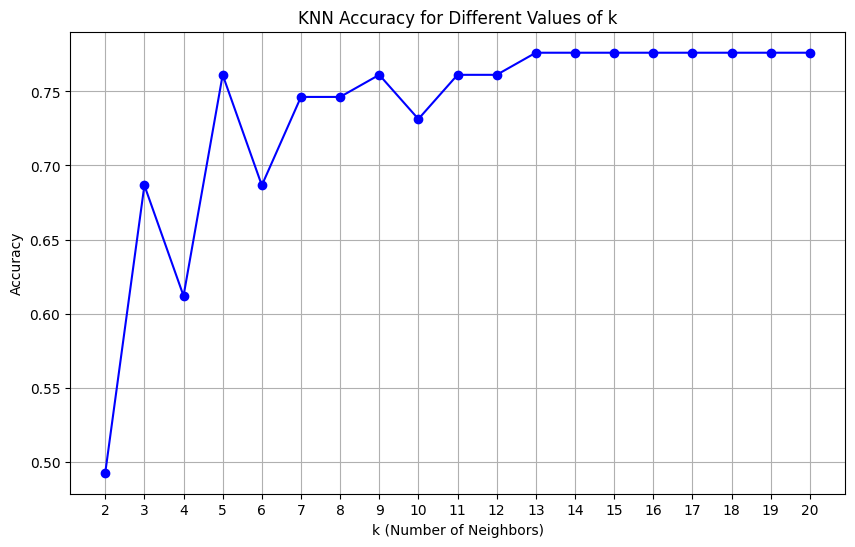

at K=13 we are getting good accuracy


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
k_values = list(range(2, 21))
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("at K=13 we are getting good accuracy")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7611940298507462
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.77      0.98      0.86        52

    accuracy                           0.76        67
   macro avg       0.39      0.49      0.43        67
weighted avg       0.60      0.76      0.67        67



In [ ]:
import pandas as pd
data=pd.read_csv("/content/Japan_life_expectancy (1).csv")
data.head()

,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,Aichi,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,Akita,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,Aomori,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,Chiba,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,Ehime,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
d= data.drop('Prefecture', axis=1)
x = d.drop("Life_expectancy", axis=1)
a = d.drop('Welfare_exp', axis=1)
t = d['Welfare_exp']
X_train, X_test, y_train, y_test = train_test_split(a, t, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 1.49


[3.8392899999999996, 1.7531450000000013, 1.6405455555555553, 1.306263125, 1.4945812000000003, 1.832891944444445, 1.8140118367346953, 1.5048706250000008, 1.3321198765432112, 1.4521032000000011, 1.3087303305785125, 1.5481913194444452, 1.5298179289940843, 1.7331903571428573, 1.732068488888889, 1.7546519140625012, 1.578971972318338, 1.5578841049382721, 1.6703993905817185, 1.7192291250000014]


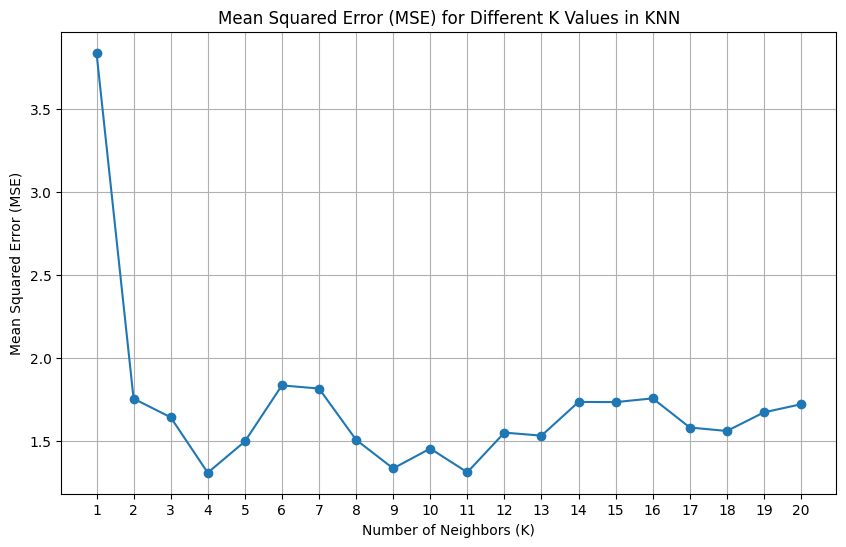

AT K=1 THE DATA SET IS SHOWING GOOD ACCURACY


In [ ]:
import matplotlib.pyplot as plt
k_values = list(range(1, 21))
mse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
print(mse_values)
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title('Mean Squared Error (MSE) for Different K Values in KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()
print("AT K=1 THE DATA SET IS SHOWING GOOD ACCURACY")